# No-show Exploration
## by Alyaa Hegazy Abdelhamid Ahmed

## Investigation Overview

In this presentation, some plots will be shown to see relationships between several variables in  univariate, bivariate and multivariate ways.

## Dataset Overview

The dataset contains 110527 rows. Each row collects information for each patient across 14 features (columns).The most important variable is the one that records if a patient shows up or not for his/her scheduled appointment.The main features that will support investigating the main variable are Gender, Age and Scholarship. Both gender and scholarship are categorical variables. Age is a quantitative variable.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
no_show= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

## (Univariate Visualizations)

In this part of the presentation, several univariate plots will be presented to dicover the distribution and the structure of the main features in the dataset.

In [3]:
new_no_show=no_show[no_show.Age != -1]
new_no_show.shape

(110526, 14)

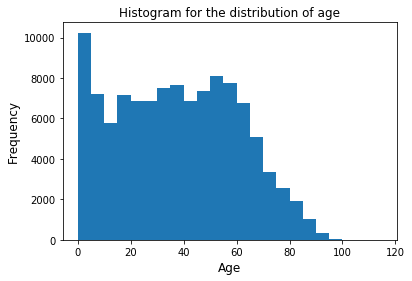

In [4]:
bins= np.arange(0,new_no_show['Age'].max()+5,5)
plt.hist(data=new_no_show, x='Age',bins=bins);
plt.title('Histogram for the distribution of age')
plt.xlabel('Age', fontsize =12);
plt.ylabel('Frequency', fontsize =12);

From the above histogram, it is noticed that the distribution of age is skewed to the right. In additon, the majority of patients are young. The dataset contains outlier cases since there are few patients with ages greater than 100 years. One choice to deal with these cases is to delete them from the dataset. In this project, these cases will not be removed.

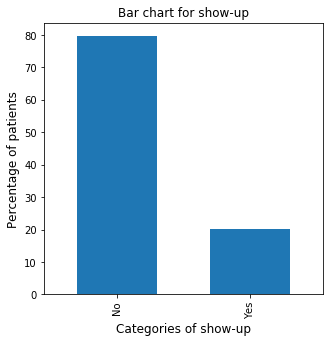

In [5]:
# To know the count of patients who will show up
count_show =new_no_show['No-show'].value_counts()
perc_show= (count_show/110526)*100
perc_show.plot(kind='bar',figsize =(5,5), width =0.6);
plt.title('Bar chart for show-up', fontsize=12);
plt.xlabel('Categories of show-up', fontsize =12);
plt.ylabel('Percentage of patients', fontsize =12);


The above bar chart shows that the percentage of patients who showed up (say no) to their scheduled appointments is higher than that of those who did not show up (say yes) by about 60%.

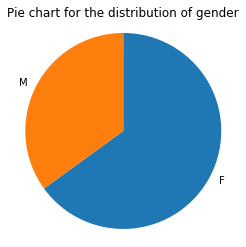

In [6]:
count_gender= new_no_show['Gender'].value_counts()
perc_gender = (count_gender/110526)*100
sorted_counts = no_show['Gender'].value_counts()
plt.pie(perc_gender , labels=sorted_counts.index, startangle = 90, counterclock = False);
plt.title('Pie chart for the distribution of gender')
plt.axis('square');

The pie chart indicates that the percentage of females in the dataset is higher than that of males by about 30%.

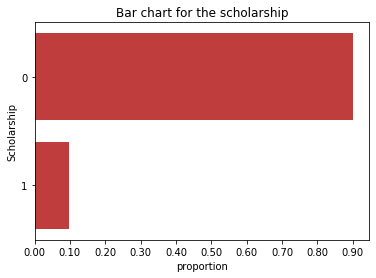

In [7]:
count_scho= new_no_show['Scholarship'].value_counts()
## Creating  a bar chart for the scholarship variable using relative frequencies instead of absolute counts
scho_counts = new_no_show['Scholarship'].value_counts()
# Returns the sum of all not-null values in `Scholarship` column
n_scho = new_no_show['Scholarship'].value_counts().sum()
# Return the highest frequency in the `Scholarship` column
max_scho_count = scho_counts[0]
# Return the maximum proportion,
max_prop = max_scho_count / n_scho
# Using numpy.arange() function to produce a set of evenly spaced proportioned values  between 0 and max_prop
base_color=sb.color_palette()[3]
tick_props = np.arange(0, max_prop, 0.1)
scho_order = scho_counts.index
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
# Creating a horizontal bar chart for scholarship 
sb.countplot(data=new_no_show, y='Scholarship', color=base_color);
# Change the tick locations and labels
plt.xticks(tick_props * n_scho, tick_names)
plt.xlabel('proportion');
plt.title('Bar chart for the scholarship');

The bar chart indicates that the majority of patients don't have financial support from the Brazilian government (Bolsa Familia). Only 10% of the patients have a scholarship from the government.

## ## Bivariate Exploration


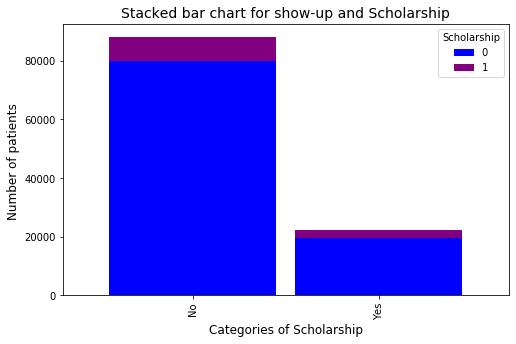

In [8]:
# First: creating a stacked bar chart to investigate the relationship between having a scholarship and showing up
new_no_show.groupby(['No-show', 'Scholarship']).size().unstack().plot(kind='bar', stacked=True,width= 0.9, figsize=(8, 5), color =('blue', 'purple'));
plt.title('Stacked bar chart for show-up and Scholarship', fontsize=14)
plt.xlabel('Categories of Scholarship', fontsize =12)
plt.ylabel('Number of patients ', fontsize =12);

The stacked bar chart indicates that the majority of patients who showed up for their scheduled appointments did not have any finacial support from the government. This implies that there is no significant relation between having a scholarship and showing up.

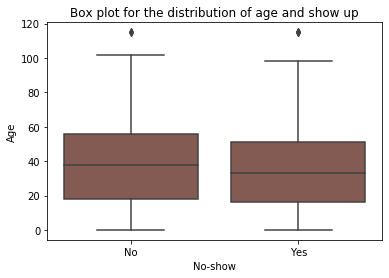

In [9]:
## Second: Creating a box plot for age and showing up variables
base_color=sb.color_palette()[5]
sb.boxplot(data=new_no_show,x='No-show', y='Age',color=base_color);
plt.title('Box plot for the distribution of age and show up');

The box plot for the distribution of age for the patients who showed up and those who did not is approximately equal. Both distributions contain an outlier case.

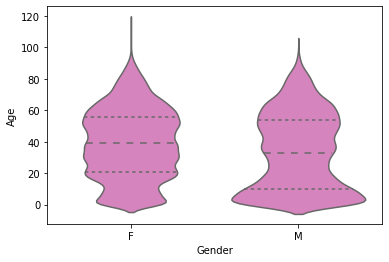

In [10]:
## Third: Creating a violin plot for age and gender variables
base_color=sb.color_palette()[6]
sb.violinplot(data=new_no_show,x='Gender', y='Age',color=base_color, inner='quartile');

The violin plot indicates that the median age for females is larger than that for males. In addition, the dataset contains more younger males than females. The distribution of females has an outlier case with age close to 120 years old.

## (Multivariate Exploration)



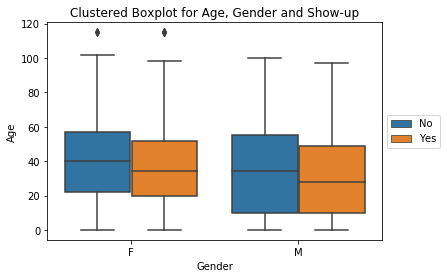

In [11]:
## Creating clustered box plot for age, gender and show-up
sb.boxplot(data = new_no_show, x = 'Gender', y = 'Age', hue = 'No-show');
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)); # legend to right of figure
plt.title('Clustered Boxplot for Age, Gender and Show-up');

The above clustered box plot indicates that in each class of gender, the ages for those who showed up is higher than that for those who did not show up. The female category contains outlier cases for both who showed up and who did not.